In [1]:
pip install FuzzyTM


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade gensim


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/23.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/23.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/23.3 MB ? eta -:--:--
     --------------------------------------- 0.0/23.3 MB 108.9 kB/s eta 0:03:34
     --------------------------------------- 0.0/23.3 MB 108.9 kB/s eta 0:03:34
     --------------------------------------- 0.1/23.3 MB 201.8 kB/s eta 0:01:56
     --------------------------------------- 0.2/23.3 MB 577.4 kB/s eta 0:00:41
     --------------------------------------- 0.3/23.3 MB 965.4 kB/s eta 0:00:24
     - -------------------------------------- 0.8/23.3 MB 2.2 MB/s eta 0:00:10
     --- ------------------------------------ 2.2/23.3 MB 5.4 MB/s eta 0:00:04
     ------ --------------------------------- 3.6/23.3 MB 8.1 MB/s eta 0:00:03
     ----------- ---------------------------- 6.4/23.3 MB 12.8 MB/s e

In [2]:
pip install --user --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydub


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
pip install librosa


Defaulting to user installation because normal site-packages is not writeable
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata (14 kB)
  Using cached pooch-1.8.1-py3-none-any.whl.metadata (9.5 kB)
   ---------------------------------------- 0.0/260.0 kB ? eta -:--:--
   ------------ --------------------------- 81.9/260.0 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/260.0 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 260.0/260.0 kB 3.2 MB/s eta 0:00:00
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   ---------------------------------------- 75.3/75.3 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import scipy.signal
import os
from scipy.io import wavfile
import os

from pydub import AudioSegment
from pydub.utils import mediainfo
 

In [2]:
# Function to read audio files from a folder named Read_Audio
def read_audio_from_folder(Read_Audio):
    audio_data = []
    for file_name in os.listdir(Read_Audio):
        file_path = os.path.join(Read_Audio, file_name)
        if os.path.isfile(file_path) and file_name.endswith('.wav'):
            audio, sr = librosa.load(file_path, sr=None)  # Load audio file
            audio_data.append((audio, sr))
    return audio_data




In [3]:
import scipy.signal

def filter_audio(audio_data, cutoff_freq=2000, filter_type='lowpass'):
    filtered_audio_data = []
    for audio, sr in audio_data:
        # Apply filtering
        if filter_type == 'lowpass':
            nyquist = sr / 2
            cutoff_normal = cutoff_freq / nyquist
            b, a = scipy.signal.butter(6, cutoff_normal, btype='low')
            filtered_audio = scipy.signal.filtfilt(b, a, audio)
        elif filter_type == 'highpass':
            nyquist = sr / 2
            cutoff_normal = cutoff_freq / nyquist
            b, a = scipy.signal.butter(6, cutoff_normal, btype='high')
            filtered_audio = scipy.signal.filtfilt(b, a, audio)
        else:
            raise ValueError("Unsupported filter type. Supported types: 'lowpass', 'highpass'")
        filtered_audio_data.append((filtered_audio, sr))
    return filtered_audio_data



In [4]:
# Function to save filtered audio to new files
        
def save_filtered_audio(filtered_audio_data, Filtered_Audio):
    for i, (audio, sr) in enumerate(filtered_audio_data):
        output_path = os.path.join(Filtered_Audio, f'filtered_audio_{i}.wav')
        wavfile.write(output_path, sr, audio)


In [5]:
# Example usage

Read_Audio = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Earthquake'
Filtered_Audio = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Clean\Earthquake'


In [6]:
# Read audio files from folder
audio_data = read_audio_from_folder(Read_Audio)

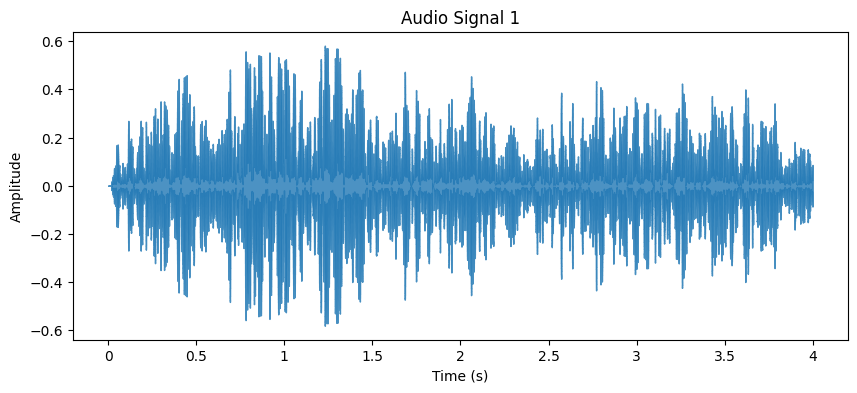

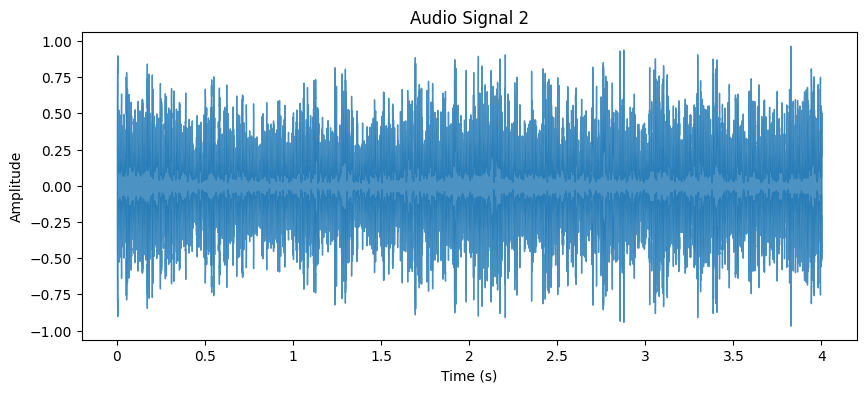

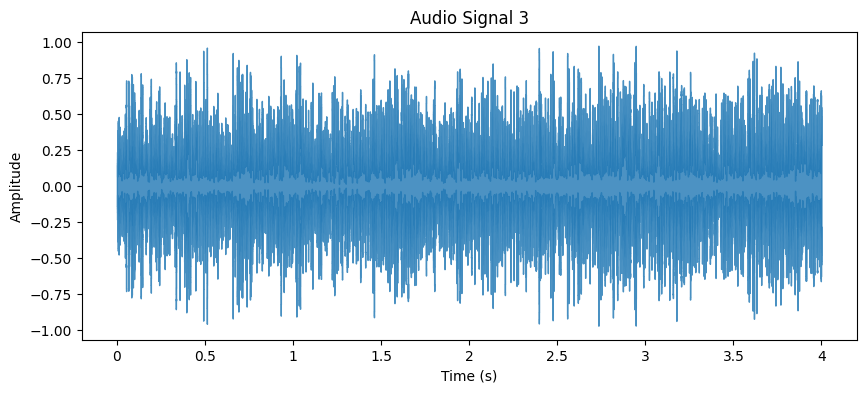

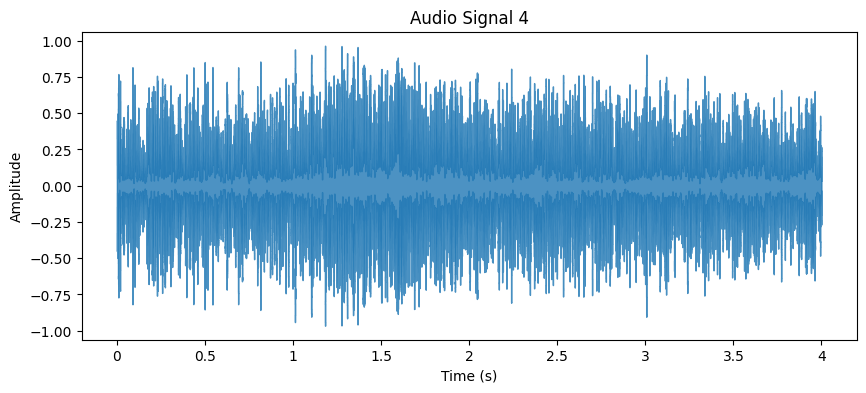

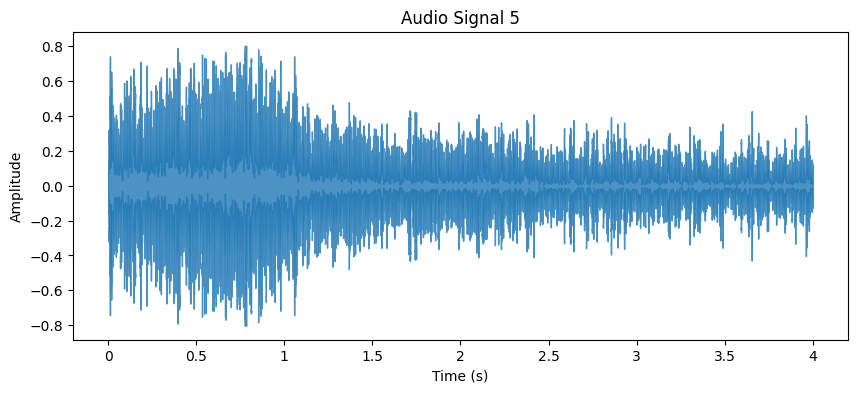

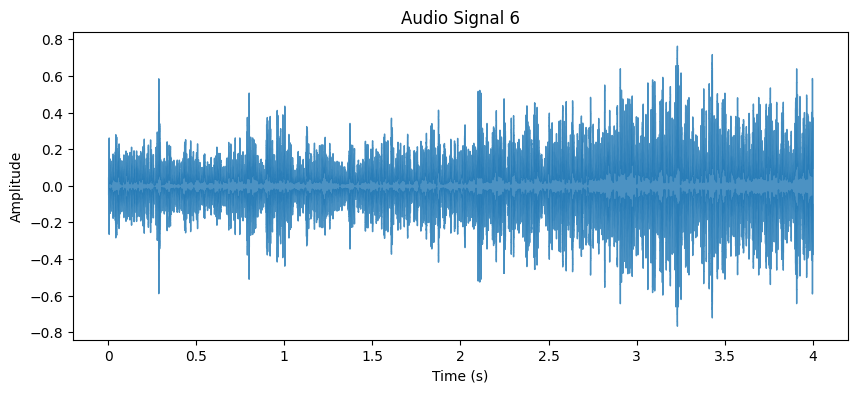

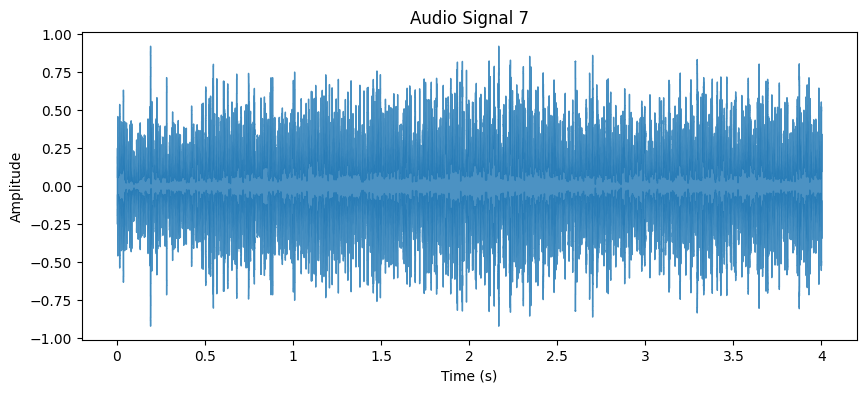

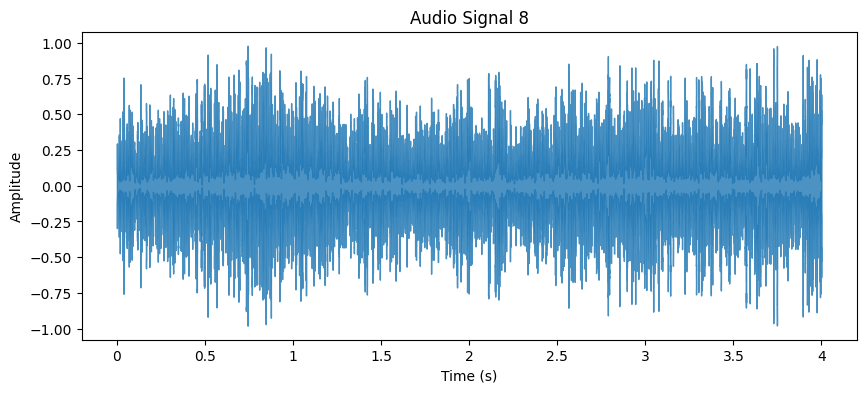

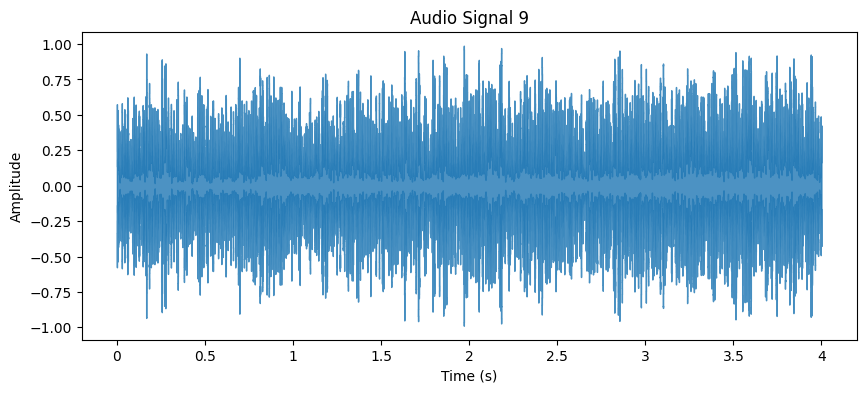

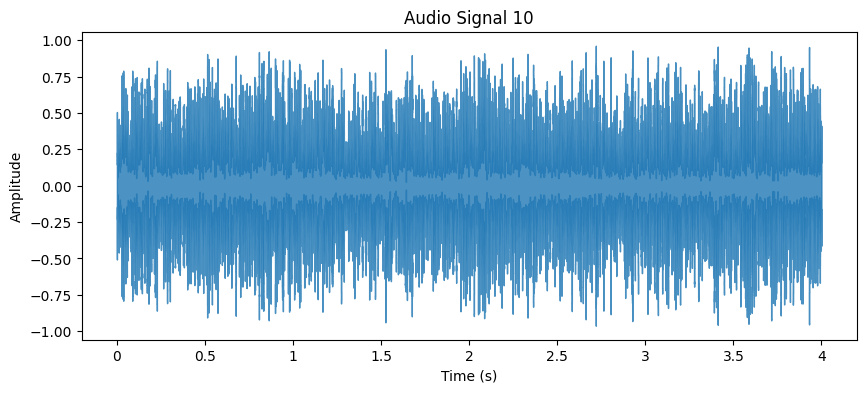

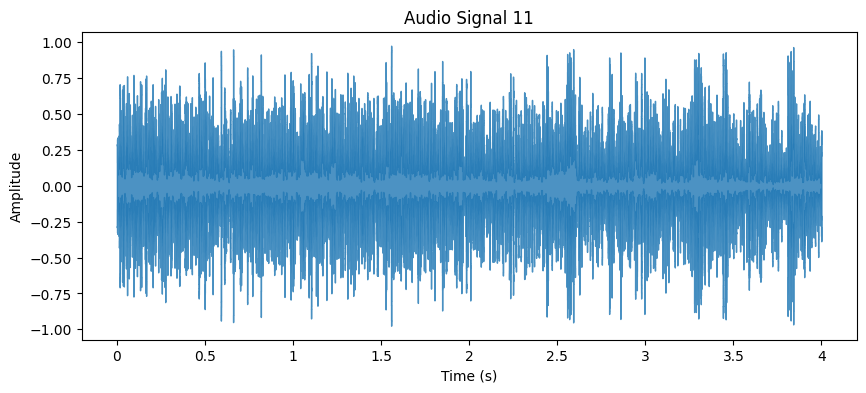

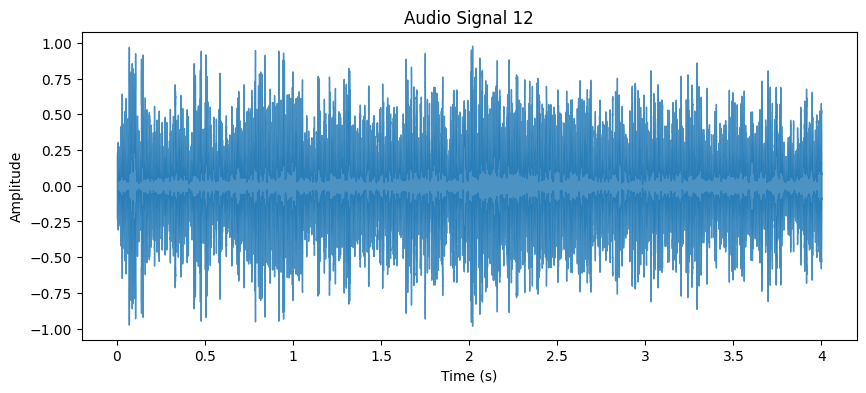

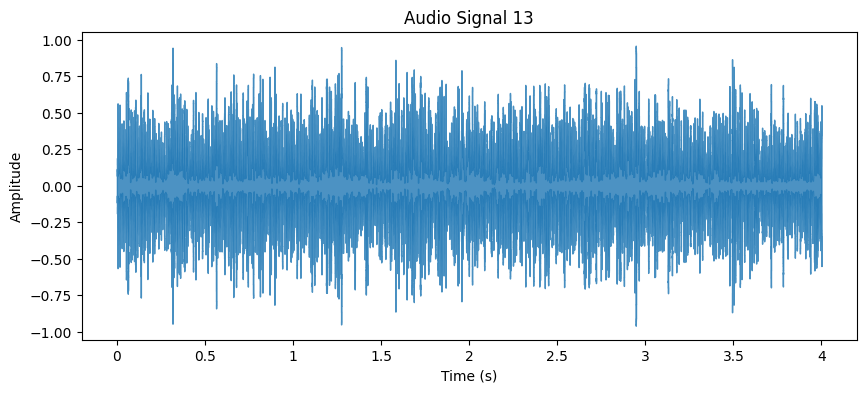

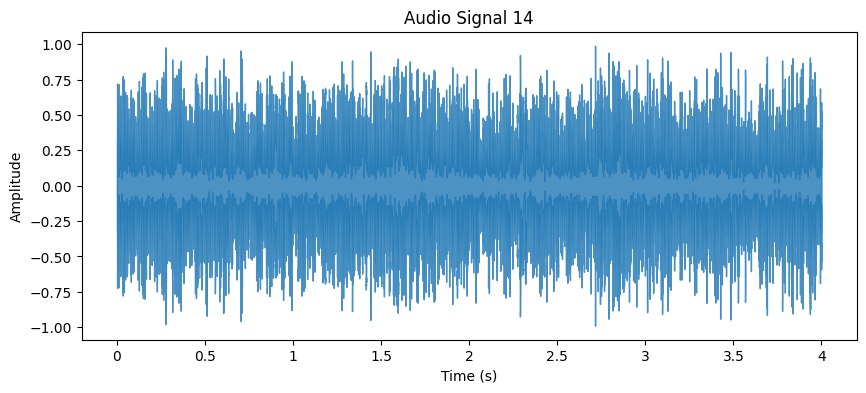

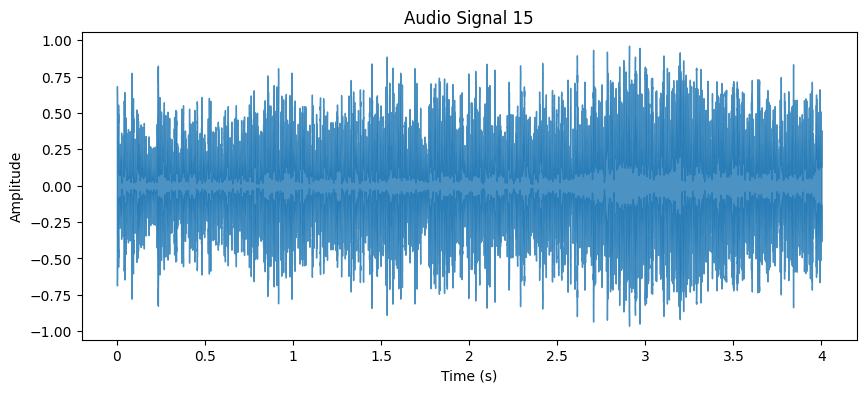

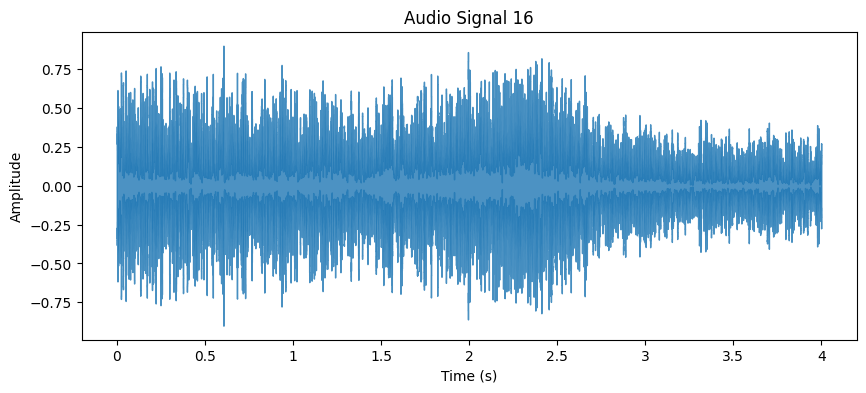

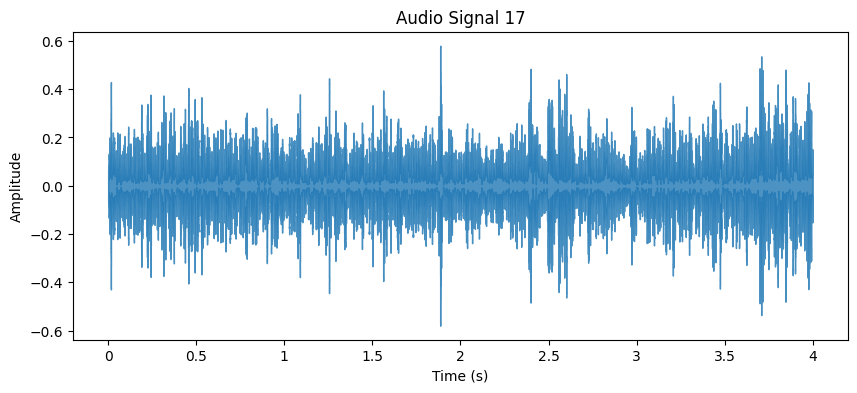

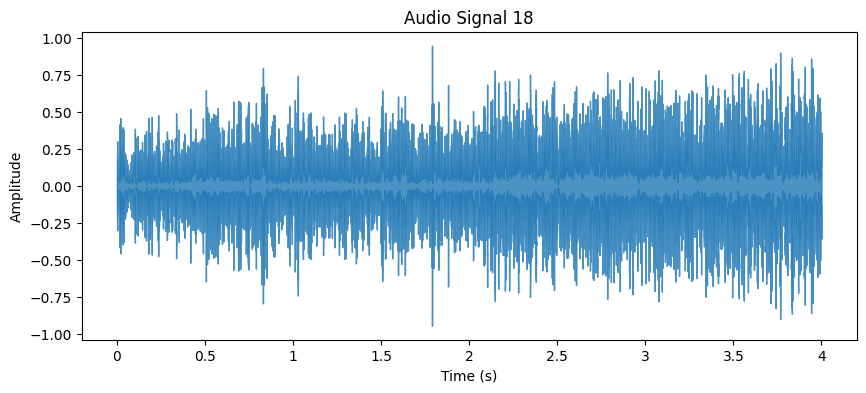

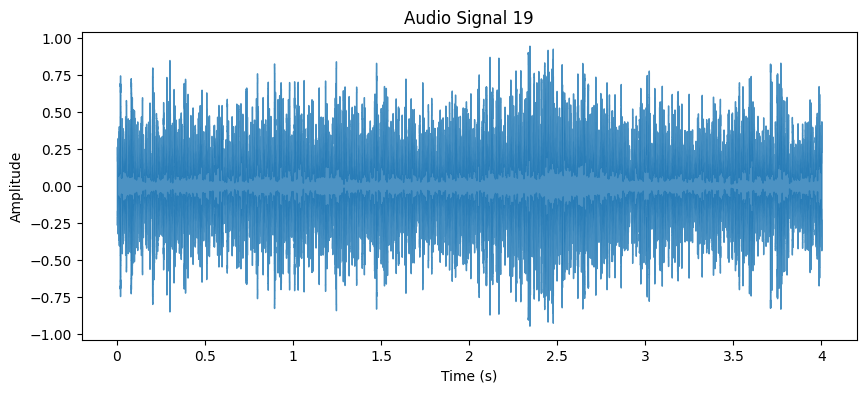

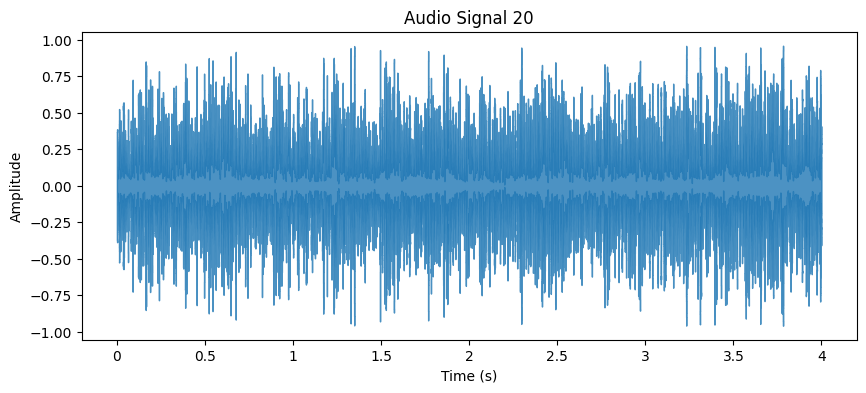

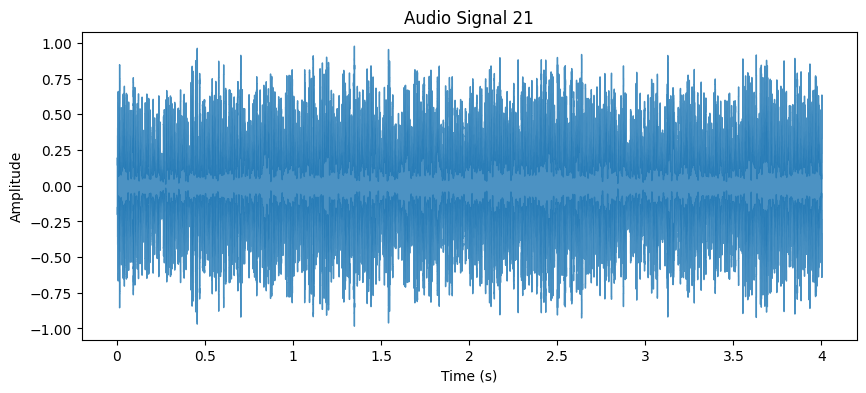

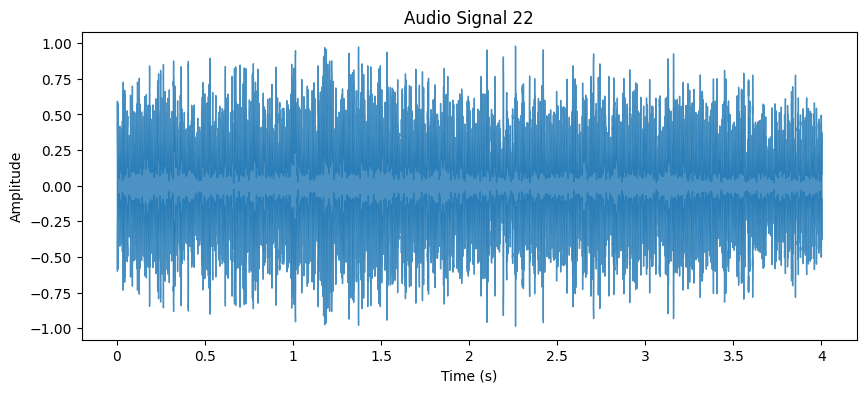

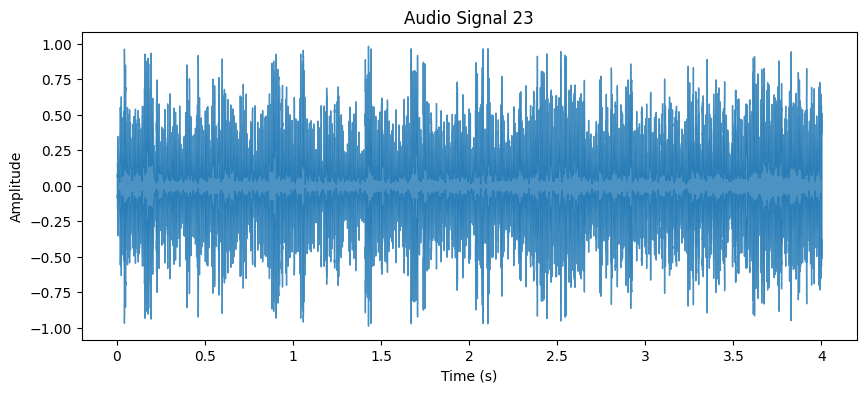

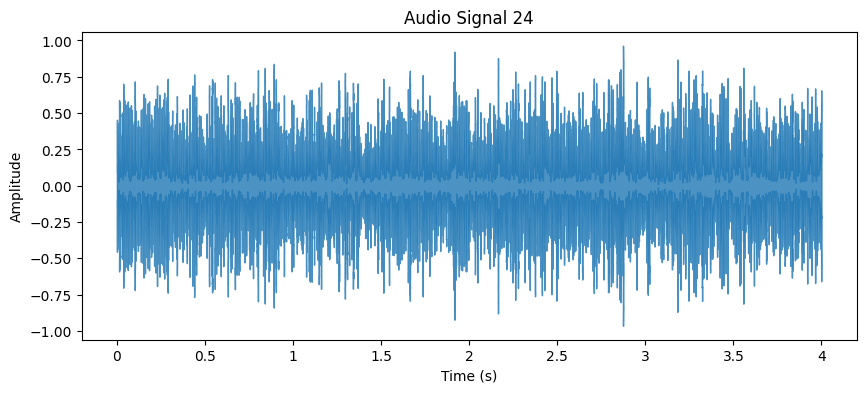

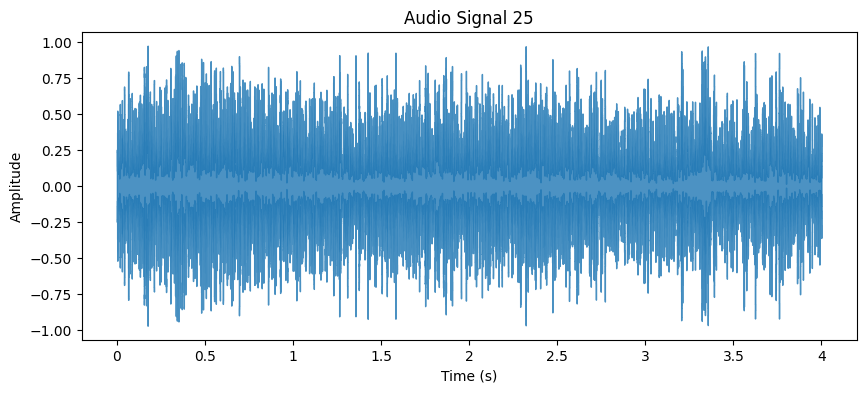

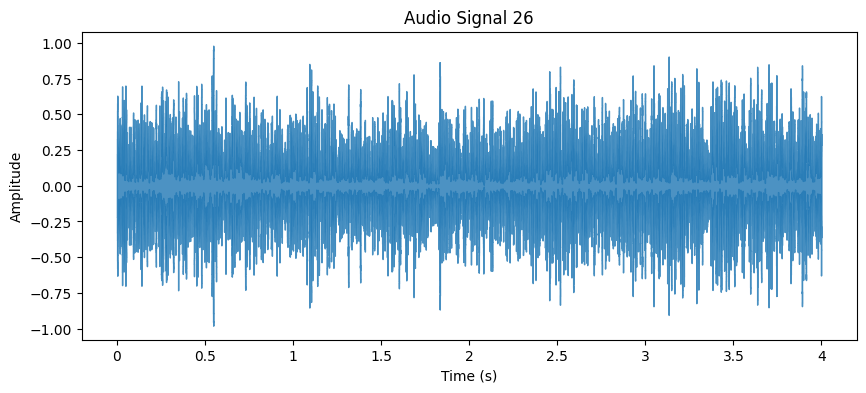

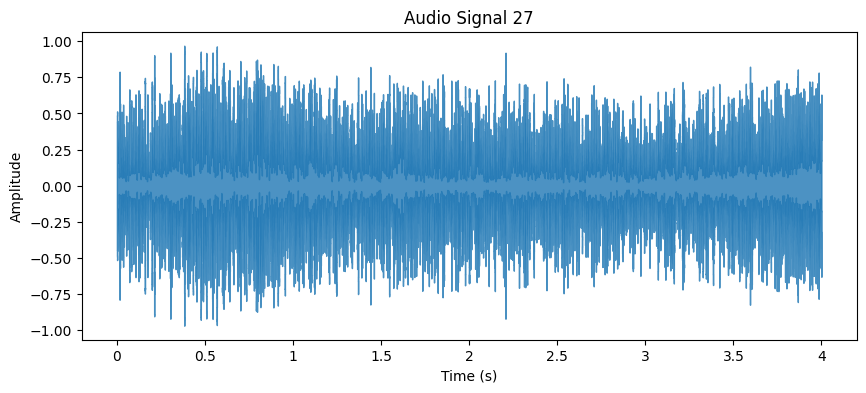

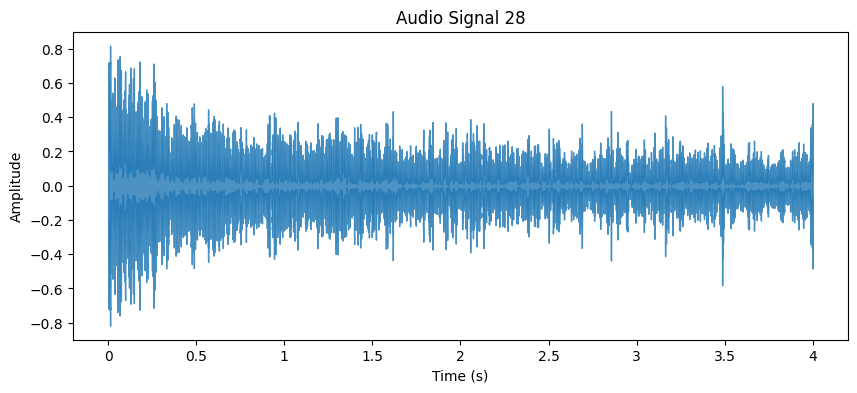

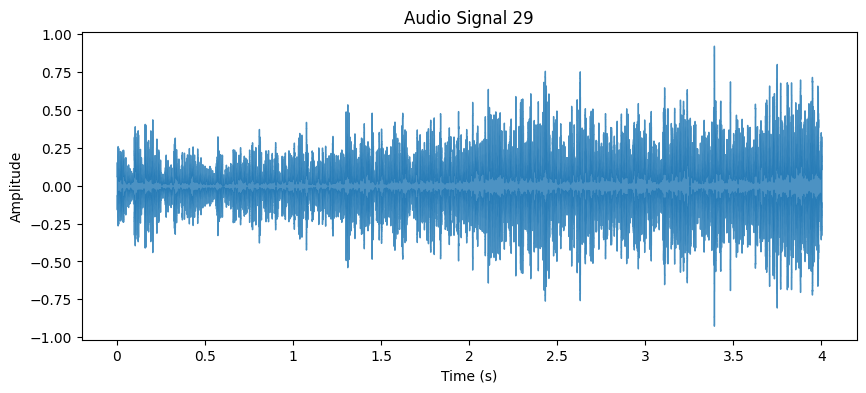

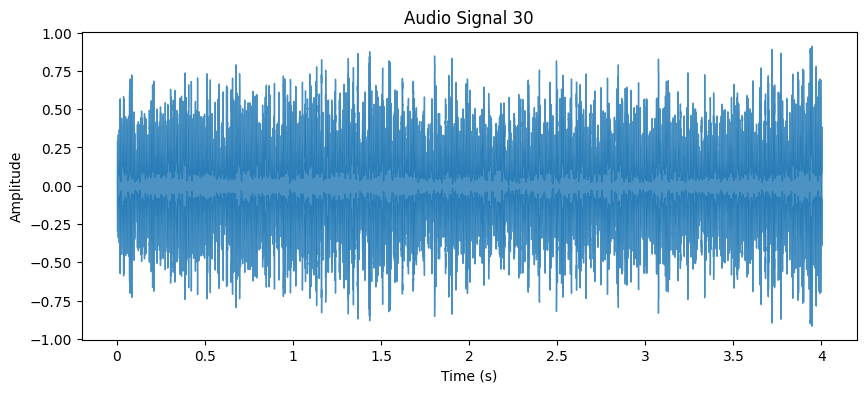

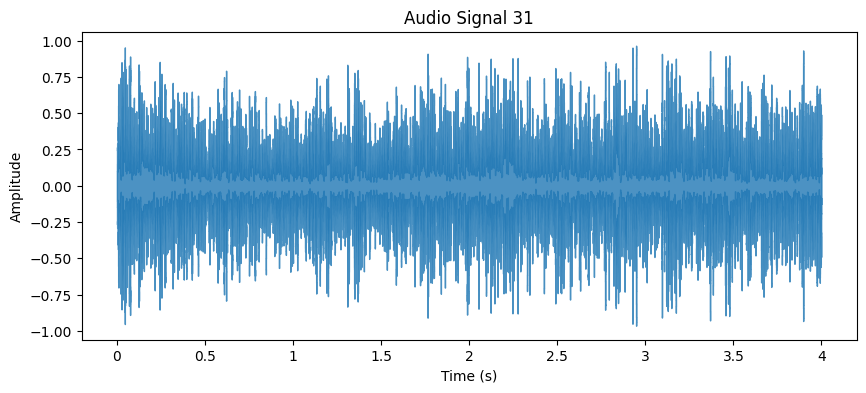

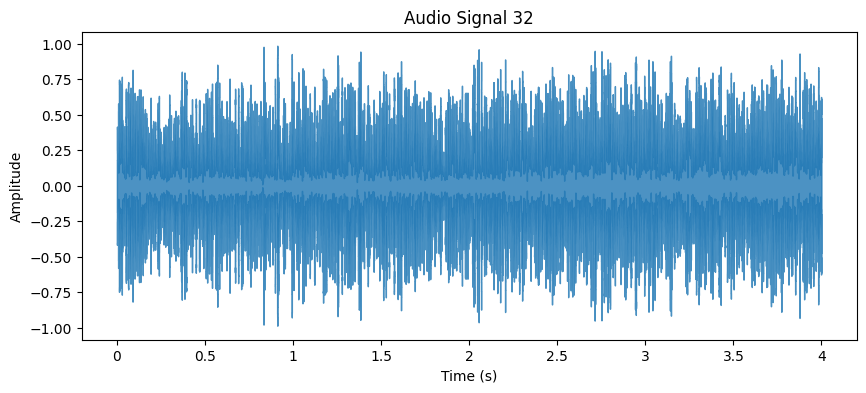

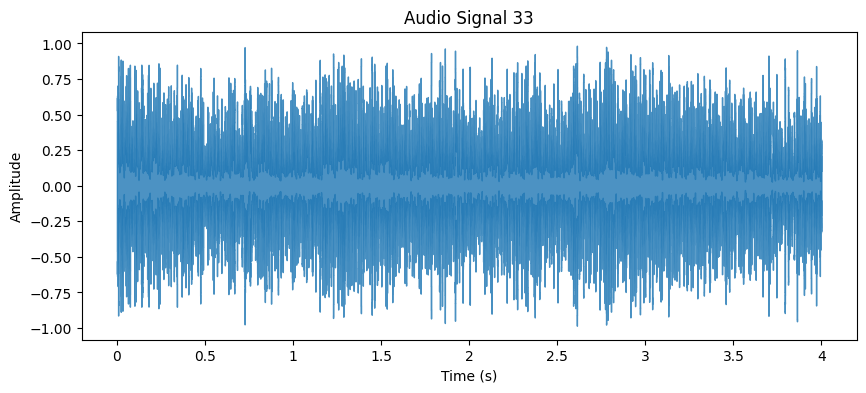

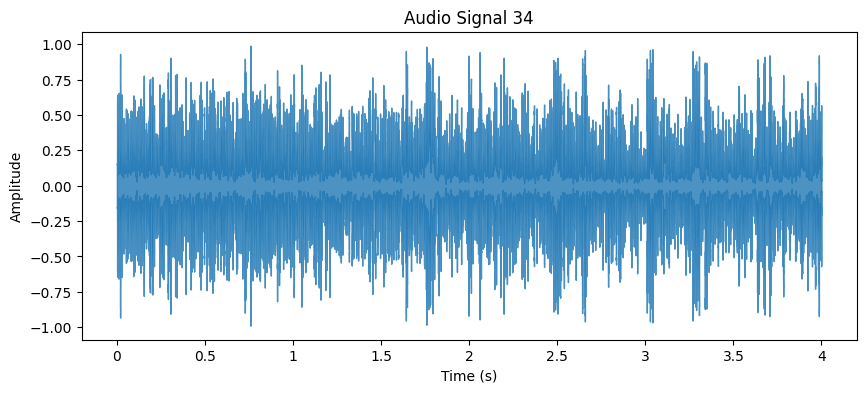

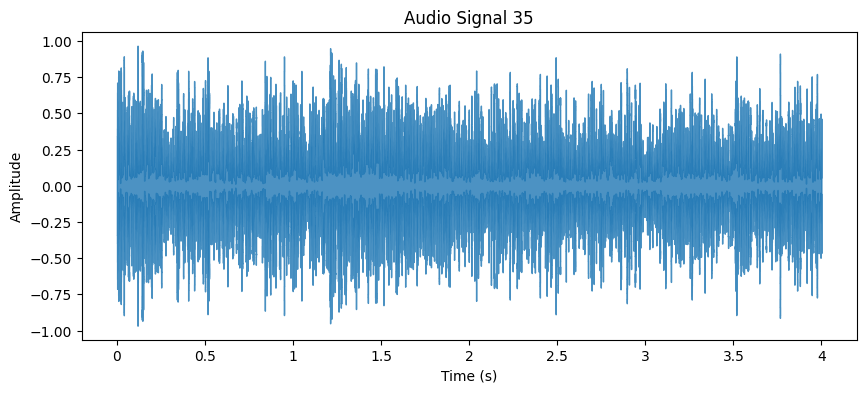

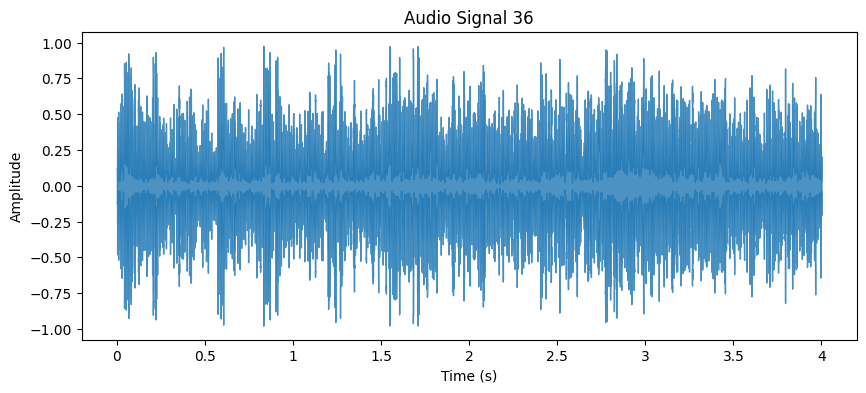

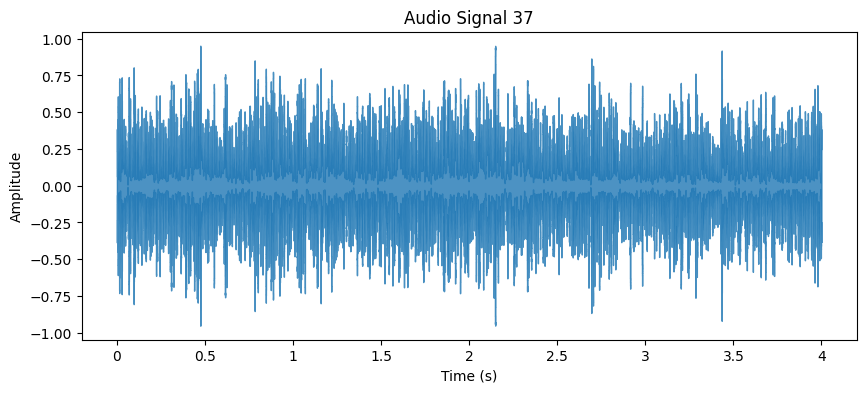

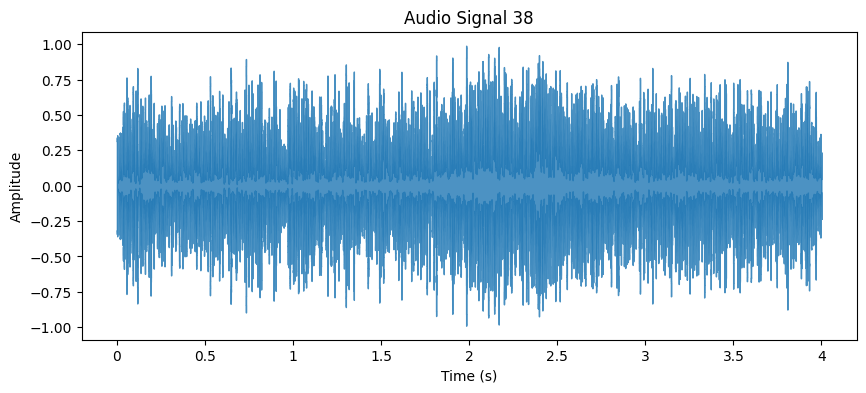

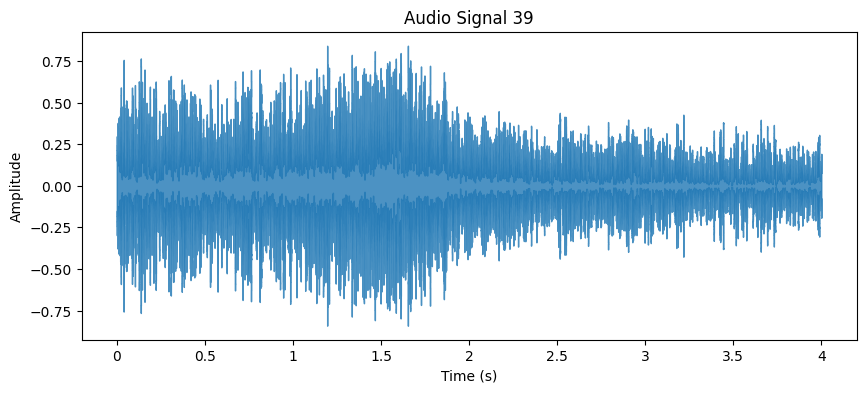

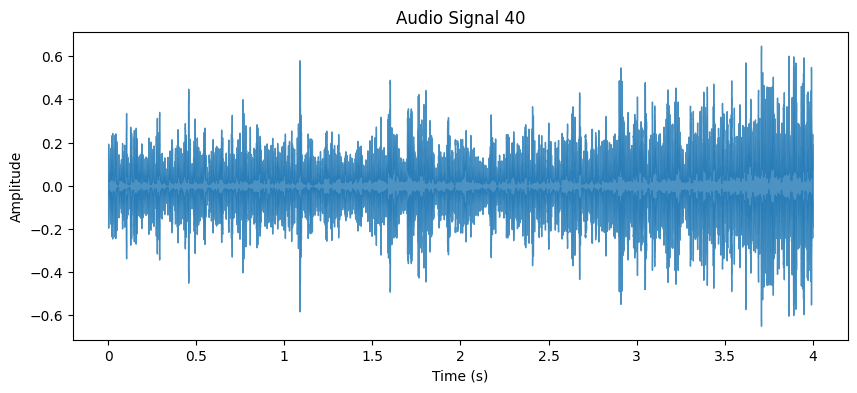

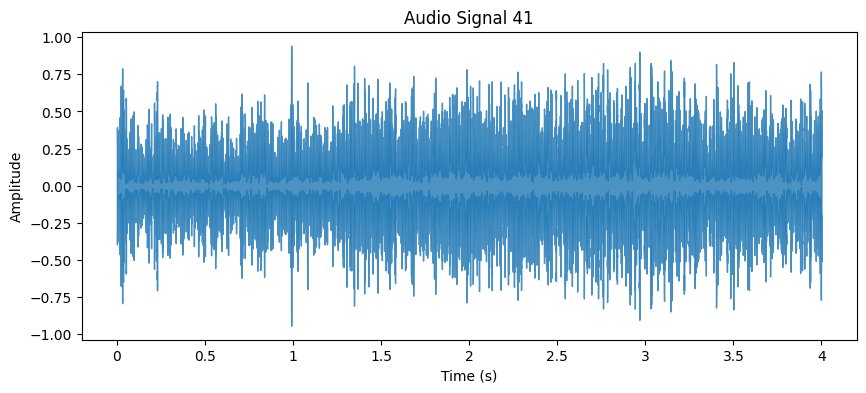

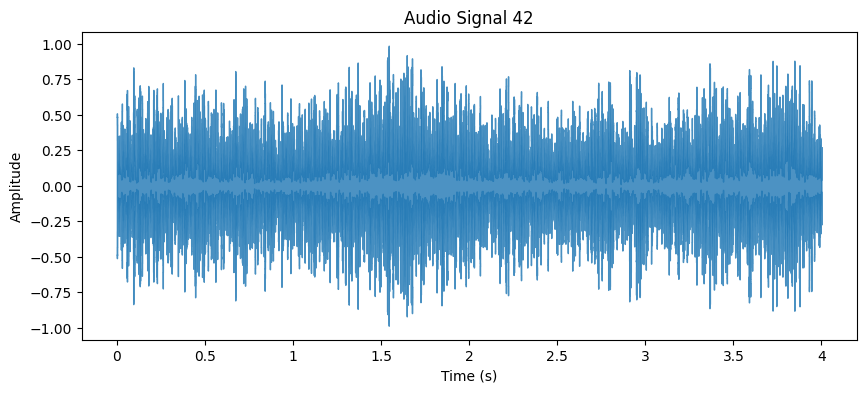

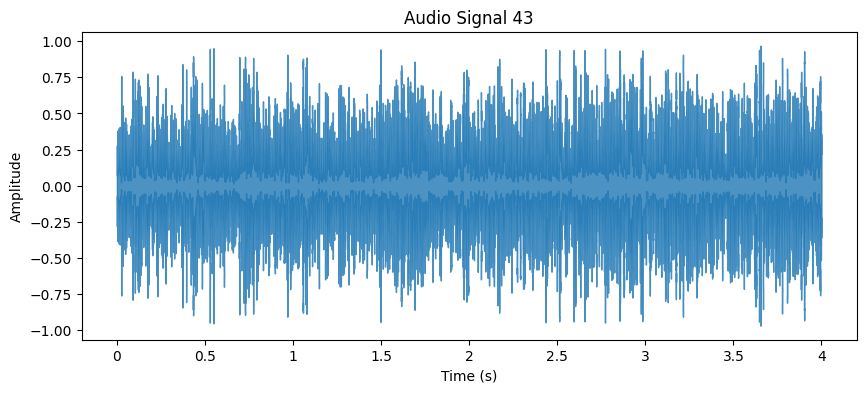

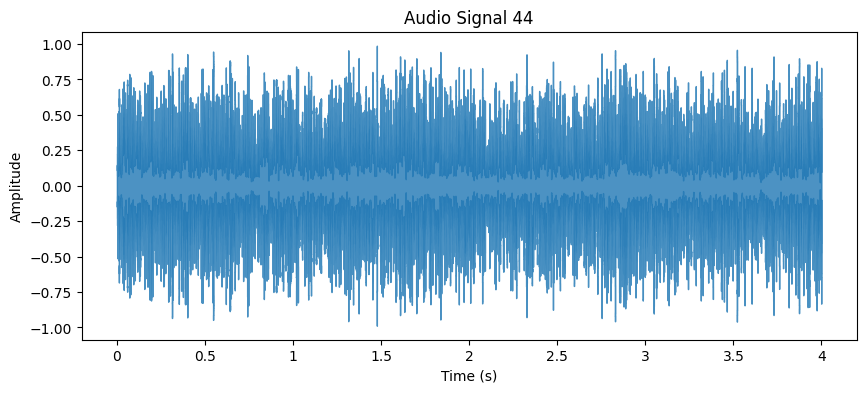

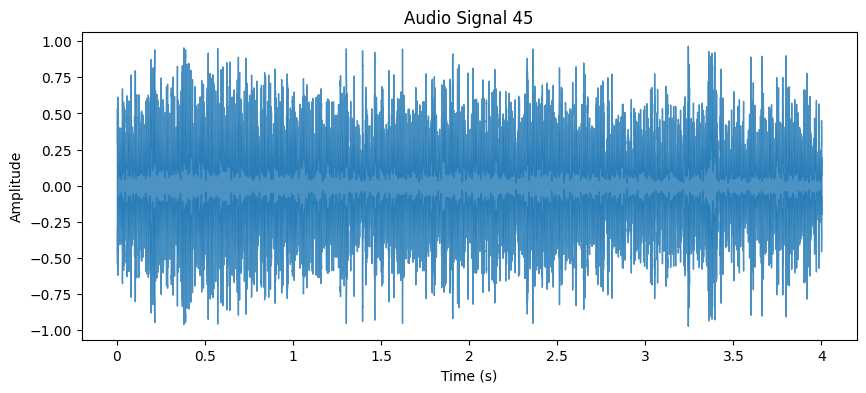

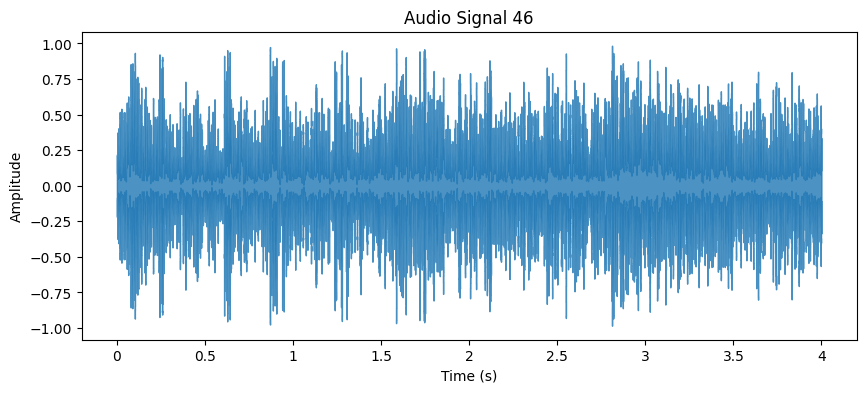

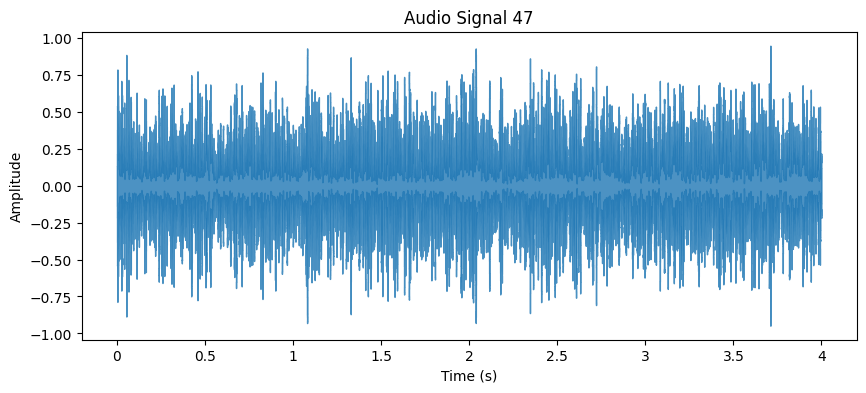

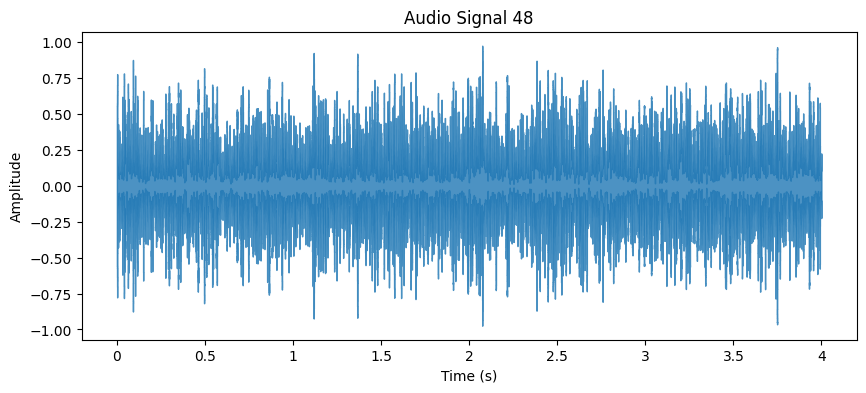

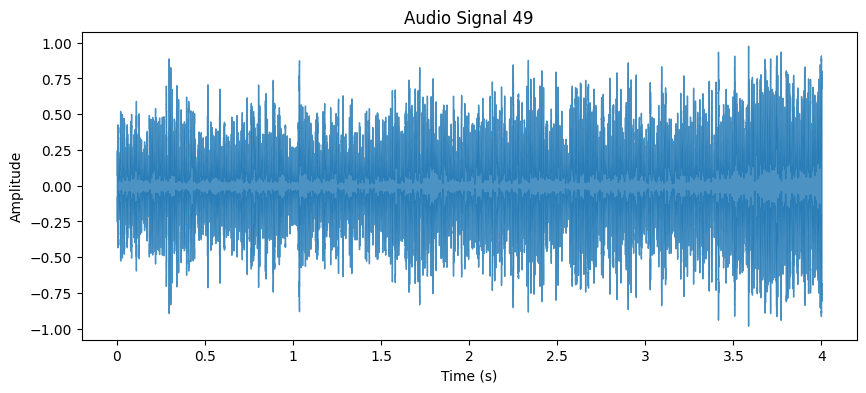

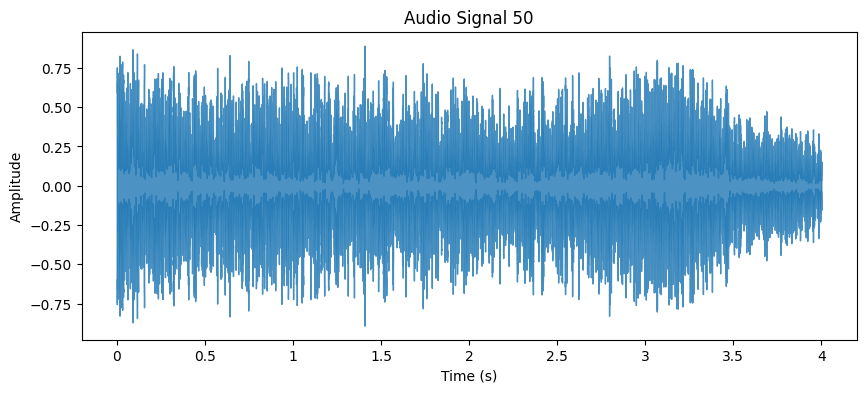

In [7]:

import matplotlib.pyplot as plt
import librosa.display

def visualize_audio_signals(audio_data, duration=5, max_images=50):
    count = 0
    for audio, sr in audio_data:
        if count >= max_images:
            break

        # Take a chunk of the audio (first 'duration' seconds)
        audio_chunk = audio[:int(sr * duration)]

        # Create time axis
        time_axis = librosa.times_like(audio_chunk, sr=sr)

        # Plot the audio signal
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio_chunk, sr=sr, alpha=0.8)
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Audio Signal {count + 1}")
        plt.show()

        count += 1

 #Example usage
# `audio_data` is already defined as a list of tuples with audio and sample rate
visualize_audio_signals(audio_data)



In [9]:
# Filter audio data (e.g., lowpass filtering with cutoff frequency of 1500 Hz)
filtered_audio_data = filter_audio(audio_data, cutoff_freq=1500, filter_type='lowpass')

In [10]:
# Save filtered audio to new files
save_filtered_audio(filtered_audio_data, Filtered_Audio)